Assignment 4: Uninformed Search Strategies - **Rat in a Maze**

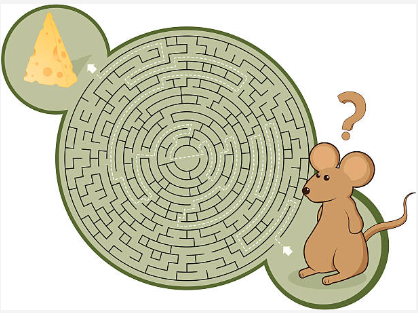

In this assignment a Rat (Agent)  is trying to find the shortest route from a starting cell to a target cheese cell in a maze (environment).

A simple maze consists of a rectangular grid of cells (usually square), a rat, and a "cheese" cell.

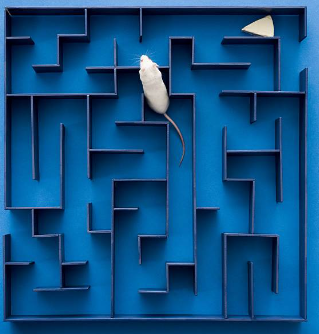

We will use small 5x5 maze as example.

The cheese is always at the bottom right cell of the maze.

A framework consists of an **environment** and an **agent** which acts in this environment.
In our case the environment is a classical square maze with 3 types of cells:
* free,
* occupied,
* target.

The rat 🐀 can start from any free cell and is allowed to travel on the free cells only.


Our agent's sole purpose in life is to get to the cheese. 🧀

We have exactly 4 actions which we must encode as integers 0-3:
* 0 - left
* 1 - up
* 2 - right
* 3 - down



In [1]:
import os
import sys

In [2]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#path = '/content/drive/MyDrive/Colab_Notebooks/cs3220_A4/src' #@param {type: "string"}
#sys.path.append(path)

In [5]:
%matplotlib inline

In [6]:
from mazeData import makeMaze, defineMazeActions

In [7]:
n=5

In [8]:
a=makeMaze(n)
a

array([[1, 0, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1]])

In [9]:
a[0,1] #a[0][1]

np.int64(0)

In [10]:
mazeActs=defineMazeActions(a)

In [11]:
mazeActs

{(0, 0): ['right', 'down'],
 (0, 1): ['left', 'right', 'down'],
 (0, 2): ['left', 'right', 'down'],
 (0, 3): ['left', 'right', 'down'],
 (0, 4): ['left', 'down'],
 (1, 0): ['up', 'right', 'down'],
 (1, 1): ['left', 'up', 'right', 'down'],
 (1, 2): ['left', 'up', 'right', 'down'],
 (1, 3): ['left', 'up', 'right', 'down'],
 (1, 4): ['left', 'up', 'down'],
 (2, 0): ['up', 'right', 'down'],
 (2, 1): ['left', 'up', 'right', 'down'],
 (2, 2): ['left', 'up', 'right', 'down'],
 (2, 3): ['left', 'up', 'right', 'down'],
 (2, 4): ['left', 'up', 'down'],
 (3, 0): ['up', 'right', 'down'],
 (3, 1): ['left', 'up', 'right', 'down'],
 (3, 2): ['left', 'up', 'right', 'down'],
 (3, 3): ['left', 'up', 'right', 'down'],
 (3, 4): ['left', 'up', 'down'],
 (4, 0): ['up', 'right'],
 (4, 1): ['left', 'up', 'right'],
 (4, 2): ['left', 'up', 'right'],
 (4, 3): ['left', 'up', 'right'],
 (4, 4): []}

In [12]:
from mazeData import makeMazeTransformationModel

In [13]:
maze=makeMazeTransformationModel(mazeActs)

In [14]:
maze

{(0, 0): {'right': (0, 1), 'down': (1, 0)},
 (0, 1): {'left': (0, 0), 'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3), 'down': (1, 2)},
 (0, 3): {'left': (0, 2), 'right': (0, 4), 'down': (1, 3)},
 (0, 4): {'left': (0, 3), 'down': (1, 4)},
 (1, 0): {'up': (0, 0), 'right': (1, 1), 'down': (2, 0)},
 (1, 1): {'left': (1, 0), 'up': (0, 1), 'right': (1, 2), 'down': (2, 1)},
 (1, 2): {'left': (1, 1), 'up': (0, 2), 'right': (1, 3), 'down': (2, 2)},
 (1, 3): {'left': (1, 2), 'up': (0, 3), 'right': (1, 4), 'down': (2, 3)},
 (1, 4): {'left': (1, 3), 'up': (0, 4), 'down': (2, 4)},
 (2, 0): {'up': (1, 0), 'right': (2, 1), 'down': (3, 0)},
 (2, 1): {'left': (2, 0), 'up': (1, 1), 'right': (2, 2), 'down': (3, 1)},
 (2, 2): {'left': (2, 1), 'up': (1, 2), 'right': (2, 3), 'down': (3, 2)},
 (2, 3): {'left': (2, 2), 'up': (1, 3), 'right': (2, 4), 'down': (3, 3)},
 (2, 4): {'left': (2, 3), 'up': (1, 4), 'down': (3, 4)},
 (3, 0): {'up': (2, 0), 'right': (3, 1), 'down': (4, 0)},
 

In [15]:
from mazeData import mazeStatesLocations

In [16]:
res=mazeStatesLocations(n)
res

{(0, 0): (4, 2),
 (0, 1): (3, 0),
 (0, 2): (1, 5),
 (0, 3): (5, 2),
 (0, 4): (4, 2),
 (1, 0): (6, 2),
 (1, 1): (0, 6),
 (1, 2): (1, 1),
 (1, 3): (1, 0),
 (1, 4): (5, 2),
 (2, 0): (1, 5),
 (2, 1): (3, 1),
 (2, 2): (2, 5),
 (2, 3): (3, 1),
 (2, 4): (3, 2),
 (3, 0): (3, 6),
 (3, 1): (5, 6),
 (3, 2): (6, 2),
 (3, 3): (2, 3),
 (3, 4): (2, 5),
 (4, 0): (2, 3),
 (4, 1): (1, 1),
 (4, 2): (4, 3),
 (4, 3): (4, 3),
 (4, 4): (1, 3)}

In [17]:
from mazeGraphClass import mazeGraph

In [18]:
mazeWorldGraph=mazeGraph(maze,mazeStatesLocations(n))

In [19]:
a

array([[1, 0, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1]])

In [20]:
mazeWorldGraph.graph_dict

{(0, 0): {'right': (0, 1), 'down': (1, 0)},
 (0, 1): {'left': (0, 0), 'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3), 'down': (1, 2)},
 (0, 3): {'left': (0, 2), 'right': (0, 4), 'down': (1, 3)},
 (0, 4): {'left': (0, 3), 'down': (1, 4)},
 (1, 0): {'up': (0, 0), 'right': (1, 1), 'down': (2, 0)},
 (1, 1): {'left': (1, 0), 'up': (0, 1), 'right': (1, 2), 'down': (2, 1)},
 (1, 2): {'left': (1, 1), 'up': (0, 2), 'right': (1, 3), 'down': (2, 2)},
 (1, 3): {'left': (1, 2), 'up': (0, 3), 'right': (1, 4), 'down': (2, 3)},
 (1, 4): {'left': (1, 3), 'up': (0, 4), 'down': (2, 4)},
 (2, 0): {'up': (1, 0), 'right': (2, 1), 'down': (3, 0)},
 (2, 1): {'left': (2, 0), 'up': (1, 1), 'right': (2, 2), 'down': (3, 1)},
 (2, 2): {'left': (2, 1), 'up': (1, 2), 'right': (2, 3), 'down': (3, 2)},
 (2, 3): {'left': (2, 2), 'up': (1, 3), 'right': (2, 4), 'down': (3, 3)},
 (2, 4): {'left': (2, 3), 'up': (1, 4), 'down': (3, 4)},
 (3, 0): {'up': (2, 0), 'right': (3, 1), 'down': (4, 0)},
 

In [21]:
mazeWorldGraph.get((0, 0))

{(0, 1): 1, (1, 0): 1}

In [22]:
mazeWorldGraph.get((0, 0), (0,1))

1

In [23]:
mazeWorldGraph.g

{(0, 0): {(0, 1): 1, (1, 0): 1},
 (0, 1): {(0, 0): 1, (0, 2): 1, (1, 1): 1},
 (0, 2): {(0, 1): 1, (0, 3): 1, (1, 2): 1},
 (0, 3): {(0, 2): 1, (0, 4): 1, (1, 3): 1},
 (0, 4): {(0, 3): 1, (1, 4): 1},
 (1, 0): {(0, 0): 1, (1, 1): 1, (2, 0): 1},
 (1, 1): {(1, 0): 1, (0, 1): 1, (1, 2): 1, (2, 1): 1},
 (1, 2): {(1, 1): 1, (0, 2): 1, (1, 3): 1, (2, 2): 1},
 (1, 3): {(1, 2): 1, (0, 3): 1, (1, 4): 1, (2, 3): 1},
 (1, 4): {(1, 3): 1, (0, 4): 1, (2, 4): 1},
 (2, 0): {(1, 0): 1, (2, 1): 1, (3, 0): 1},
 (2, 1): {(2, 0): 1, (1, 1): 1, (2, 2): 1, (3, 1): 1},
 (2, 2): {(2, 1): 1, (1, 2): 1, (2, 3): 1, (3, 2): 1},
 (2, 3): {(2, 2): 1, (1, 3): 1, (2, 4): 1, (3, 3): 1},
 (2, 4): {(2, 3): 1, (1, 4): 1, (3, 4): 1},
 (3, 0): {(2, 0): 1, (3, 1): 1, (4, 0): 1},
 (3, 1): {(3, 0): 1, (2, 1): 1, (3, 2): 1, (4, 1): 1},
 (3, 2): {(3, 1): 1, (2, 2): 1, (3, 3): 1, (4, 2): 1},
 (3, 3): {(3, 2): 1, (2, 3): 1, (3, 4): 1, (4, 3): 1},
 (3, 4): {(3, 3): 1, (2, 4): 1, (4, 4): 1},
 (4, 0): {(3, 0): 1, (4, 1): 1},
 (4, 1): {

In [24]:
mazeWorldGraph.locations

{(0, 0): (2, 6),
 (0, 1): (0, 6),
 (0, 2): (2, 4),
 (0, 3): (4, 4),
 (0, 4): (5, 5),
 (1, 0): (6, 0),
 (1, 1): (1, 3),
 (1, 2): (6, 2),
 (1, 3): (4, 4),
 (1, 4): (0, 2),
 (2, 0): (0, 2),
 (2, 1): (5, 2),
 (2, 2): (1, 3),
 (2, 3): (2, 5),
 (2, 4): (2, 6),
 (3, 0): (0, 5),
 (3, 1): (4, 1),
 (3, 2): (5, 6),
 (3, 3): (4, 6),
 (3, 4): (4, 6),
 (4, 0): (5, 6),
 (4, 1): (3, 6),
 (4, 2): (4, 1),
 (4, 3): (2, 0),
 (4, 4): (3, 1)}

In [25]:
a

array([[1, 0, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1]])

In [26]:
from visualizations import simple_visualization

[[1 0 1 1 1]
 [1 1 1 0 1]
 [1 0 1 1 1]
 [1 1 0 1 0]
 [1 1 1 1 1]]


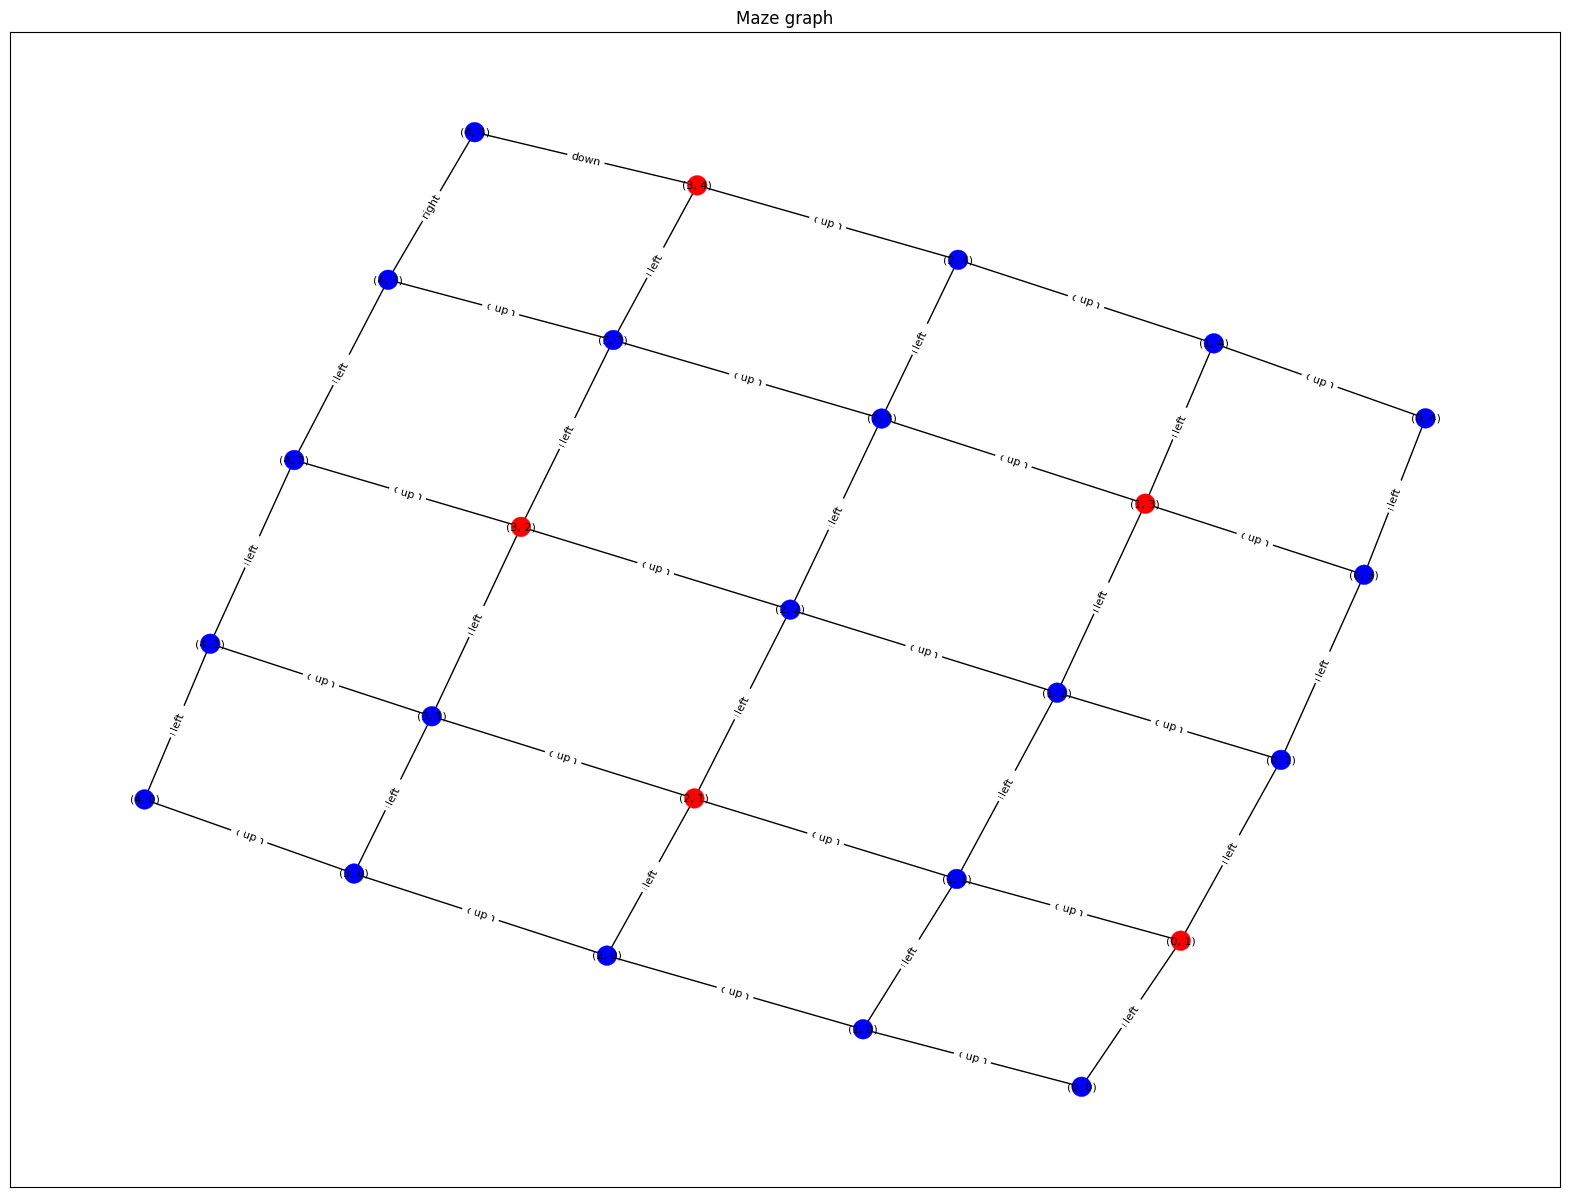

In [27]:
simple_visualization(mazeWorldGraph,a)

In [28]:
from mazeProblemClass import MazeProblem

In [29]:
initState, goalState=(0,0),(0,2)
initState

(0, 0)

In [30]:
mp1=MazeProblem(initState,goalState,mazeWorldGraph)

In [31]:
mp1.actions((0, 4))

['left', 'down']

In [32]:
a

array([[1, 0, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1]])

In [33]:
from mazeData import defineMazeAvailableActions

In [34]:
mazeAvailableActs=defineMazeAvailableActions(a)

In [35]:
mazeAvailableActs

{(0, 0): ['down'],
 (0, 1): [],
 (0, 2): ['right', 'down'],
 (0, 3): ['left', 'right'],
 (0, 4): ['left', 'down'],
 (1, 0): ['up', 'right', 'down'],
 (1, 1): ['left', 'right'],
 (1, 2): ['left', 'up', 'down'],
 (1, 3): [],
 (1, 4): ['up', 'down'],
 (2, 0): ['up', 'down'],
 (2, 1): [],
 (2, 2): ['up', 'right'],
 (2, 3): ['left', 'right', 'down'],
 (2, 4): ['left', 'up'],
 (3, 0): ['up', 'right', 'down'],
 (3, 1): ['left', 'down'],
 (3, 2): [],
 (3, 3): ['up', 'down'],
 (3, 4): [],
 (4, 0): ['up', 'right'],
 (4, 1): ['left', 'up', 'right'],
 (4, 2): ['left', 'right'],
 (4, 3): ['left', 'up', 'right'],
 (4, 4): ['up']}

In [36]:
maze1=makeMazeTransformationModel(mazeAvailableActs)
maze1

{(0, 0): {'down': (1, 0)},
 (0, 1): {},
 (0, 2): {'right': (0, 3), 'down': (1, 2)},
 (0, 3): {'left': (0, 2), 'right': (0, 4)},
 (0, 4): {'left': (0, 3), 'down': (1, 4)},
 (1, 0): {'up': (0, 0), 'right': (1, 1), 'down': (2, 0)},
 (1, 1): {'left': (1, 0), 'right': (1, 2)},
 (1, 2): {'left': (1, 1), 'up': (0, 2), 'down': (2, 2)},
 (1, 3): {},
 (1, 4): {'up': (0, 4), 'down': (2, 4)},
 (2, 0): {'up': (1, 0), 'down': (3, 0)},
 (2, 1): {},
 (2, 2): {'up': (1, 2), 'right': (2, 3)},
 (2, 3): {'left': (2, 2), 'right': (2, 4), 'down': (3, 3)},
 (2, 4): {'left': (2, 3), 'up': (1, 4)},
 (3, 0): {'up': (2, 0), 'right': (3, 1), 'down': (4, 0)},
 (3, 1): {'left': (3, 0), 'down': (4, 1)},
 (3, 2): {},
 (3, 3): {'up': (2, 3), 'down': (4, 3)},
 (3, 4): {},
 (4, 0): {'up': (3, 0), 'right': (4, 1)},
 (4, 1): {'left': (4, 0), 'up': (3, 1), 'right': (4, 2)},
 (4, 2): {'left': (4, 1), 'right': (4, 3)},
 (4, 3): {'left': (4, 2), 'up': (3, 3), 'right': (4, 4)},
 (4, 4): {'up': (3, 4)}}

In [37]:
mazeWorldGraph1=mazeGraph(maze1,mazeStatesLocations(n))

In [38]:
mazeWorldGraph1.g

{(0, 0): {(1, 0): 1},
 (0, 2): {(0, 3): 1, (1, 2): 1},
 (0, 3): {(0, 2): 1, (0, 4): 1},
 (0, 4): {(0, 3): 1, (1, 4): 1},
 (1, 0): {(0, 0): 1, (1, 1): 1, (2, 0): 1},
 (1, 1): {(1, 0): 1, (1, 2): 1},
 (1, 2): {(1, 1): 1, (0, 2): 1, (2, 2): 1},
 (1, 4): {(0, 4): 1, (2, 4): 1},
 (2, 0): {(1, 0): 1, (3, 0): 1},
 (2, 2): {(1, 2): 1, (2, 3): 1},
 (2, 3): {(2, 2): 1, (2, 4): 1, (3, 3): 1},
 (2, 4): {(2, 3): 1, (1, 4): 1},
 (3, 0): {(2, 0): 1, (3, 1): 1, (4, 0): 1},
 (3, 1): {(3, 0): 1, (4, 1): 1},
 (3, 3): {(2, 3): 1, (4, 3): 1},
 (4, 0): {(3, 0): 1, (4, 1): 1},
 (4, 1): {(4, 0): 1, (3, 1): 1, (4, 2): 1},
 (4, 2): {(4, 1): 1, (4, 3): 1},
 (4, 3): {(4, 2): 1, (3, 3): 1, (4, 4): 1},
 (4, 4): {(3, 4): 1}}

In [39]:
from visualizations import simple_visualization1

[[1 0 1 1 1]
 [1 1 1 0 1]
 [1 0 1 1 1]
 [1 1 0 1 0]
 [1 1 1 1 1]]
21
[(0, 0), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 4), (2, 0), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 3), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4)]
44 21


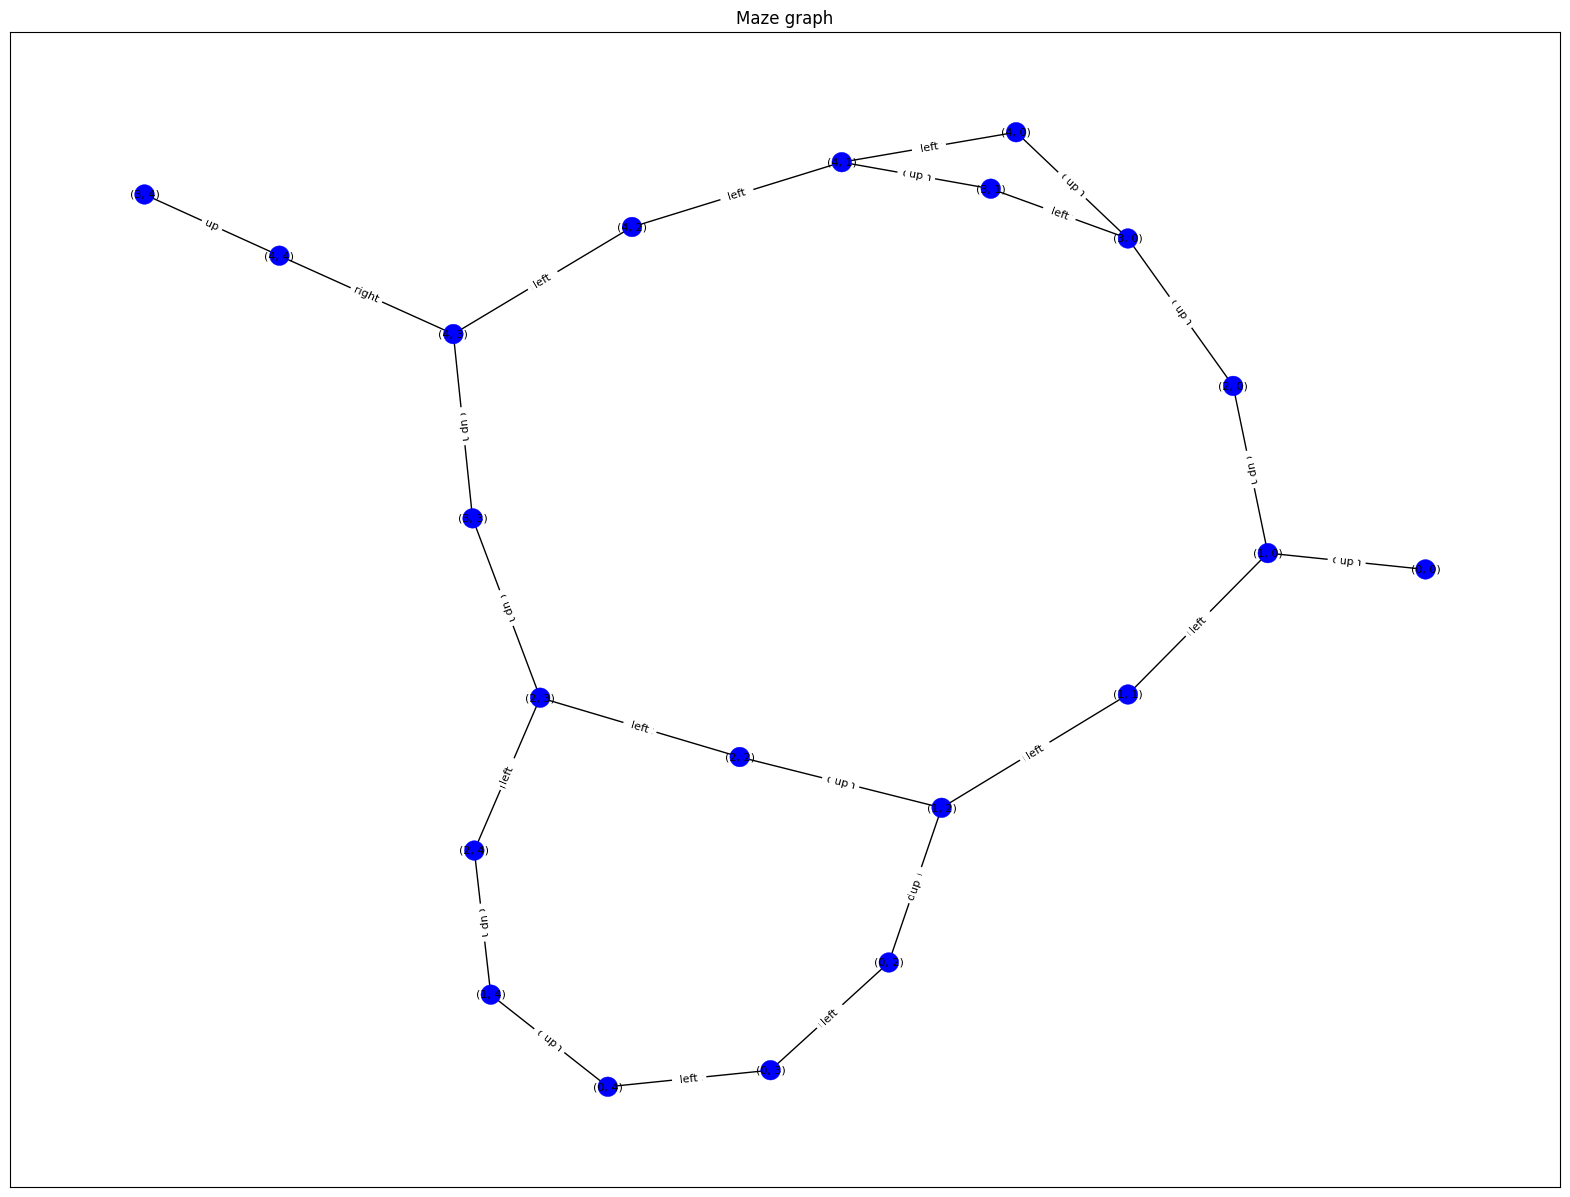

In [40]:
simple_visualization1(mazeWorldGraph1,a)

In [41]:
from mazeProblemSolvingAgentClass import MazeProblemSolvingAgent

In [42]:
ma1=MazeProblemSolvingAgent(initState,mazeWorldGraph1,goalState)

In [43]:
mp1=MazeProblem(initState,goalState,mazeWorldGraph1)

In [44]:
mp1.actions((1, 0))

['up', 'right', 'down']

In [45]:
a

array([[1, 0, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1]])

In [46]:
ma1.formulate_problem(ma1.state,ma1.goal).actions((4, 3))

['left', 'up', 'right']

In [47]:
from agents import ProblemSolvingMazeAgentBFS

In [48]:
goalState=(4,4)

In [49]:
BFS_MazeAgent1=ProblemSolvingMazeAgentBFS(initState,mazeWorldGraph1,goalState)

In [50]:
BFS_MazeAgent1.goal

(4, 4)

In [51]:
print(BFS_MazeAgent1((3,3)))

The node (3, 3) is extracted from frontier:
The child node <Node (2, 3)>.
The child node <Node (4, 3)>.
The node (2, 3) is extracted from frontier:
The child node <Node (2, 2)>.
The child node <Node (2, 4)>.
The node (2, 2) is extracted from frontier:
The child node <Node (1, 2)>.
The node (1, 2) is extracted from frontier:
The child node <Node (1, 1)>.
The child node <Node (0, 2)>.
The node (0, 2) is extracted from frontier:
The child node <Node (0, 3)>.
The node (0, 3) is extracted from frontier:
The child node <Node (0, 4)>.
The node (0, 4) is extracted from frontier:
The child node <Node (1, 4)>.
The node (1, 1) is extracted from frontier:
The child node <Node (1, 0)>.
The node (1, 0) is extracted from frontier:
The child node <Node (0, 0)>.
The child node <Node (2, 0)>.
The node (0, 0) is extracted from frontier:
The node (1, 4) is extracted from frontier:
The node (2, 0) is extracted from frontier:
The child node <Node (3, 0)>.
The node (2, 4) is extracted from frontier:
The chil

In [52]:
from agents import ProblemSolvingMazeAgentBFSShow

In [53]:
BFS_MazeAgent2=ProblemSolvingMazeAgentBFSShow(initState,mazeWorldGraph1,goalState)

In [54]:
originalGraph=mazeWorldGraph
solutionColors=BFS_MazeAgent2.work((4,0))

The node (4, 0) is extracted from frontier:
The child node <Node (3, 0)>.
The child node <Node (4, 1)>.
The node (3, 0) is extracted from frontier:
The child node <Node (2, 0)>.
The child node <Node (3, 1)>.
The node (2, 0) is extracted from frontier:
The child node <Node (1, 0)>.
The node (1, 0) is extracted from frontier:
The child node <Node (0, 0)>.
The child node <Node (1, 1)>.
The node (0, 0) is extracted from frontier:
The node (1, 1) is extracted from frontier:
The child node <Node (1, 2)>.
The node (1, 2) is extracted from frontier:
The child node <Node (0, 2)>.
The child node <Node (2, 2)>.
The node (0, 2) is extracted from frontier:
The child node <Node (0, 3)>.
The node (0, 3) is extracted from frontier:
The child node <Node (0, 4)>.
The node (0, 4) is extracted from frontier:
The child node <Node (1, 4)>.
The node (1, 4) is extracted from frontier:
The child node <Node (2, 4)>.
The node (2, 2) is extracted from frontier:
The child node <Node (2, 3)>.
The node (2, 3) is ext

In [55]:
a

array([[1, 0, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1]])

In [56]:
solutionColors

{(4, 0): 'blue',
 (3, 4): 'white',
 (4, 3): 'blue',
 (3, 1): 'blue',
 (0, 2): 'blue',
 (2, 2): 'blue',
 (1, 0): 'blue',
 (1, 3): 'white',
 (4, 2): 'blue',
 (3, 0): 'blue',
 (3, 3): 'blue',
 (0, 1): 'white',
 (2, 4): 'blue',
 (1, 2): 'blue',
 (0, 4): 'blue',
 (2, 1): 'white',
 (3, 2): 'white',
 (4, 1): 'blue',
 (4, 4): 'green',
 (0, 0): 'blue',
 (1, 1): 'blue',
 (0, 3): 'blue',
 (2, 0): 'blue',
 (1, 4): 'blue',
 (2, 3): 'blue'}

In [57]:
from visualizations import drawSearchTree

[[1 0 1 1 1]
 [1 1 1 0 1]
 [1 0 1 1 1]
 [1 1 0 1 0]
 [1 1 1 1 1]]
{(4, 0): 'blue', (3, 4): 'white', (4, 3): 'blue', (3, 1): 'blue', (0, 2): 'blue', (2, 2): 'blue', (1, 0): 'blue', (1, 3): 'white', (4, 2): 'blue', (3, 0): 'blue', (3, 3): 'blue', (0, 1): 'white', (2, 4): 'blue', (1, 2): 'blue', (0, 4): 'blue', (2, 1): 'white', (3, 2): 'white', (4, 1): 'blue', (4, 4): 'green', (0, 0): 'blue', (1, 1): 'blue', (0, 3): 'blue', (2, 0): 'blue', (1, 4): 'blue', (2, 3): 'blue'}
{(4, 0): 'blue', (3, 4): 'white', (4, 3): 'blue', (3, 1): 'blue', (0, 2): 'blue', (2, 2): 'blue', (1, 0): 'blue', (1, 3): 'white', (4, 2): 'blue', (3, 0): 'blue', (3, 3): 'blue', (0, 1): 'white', (2, 4): 'blue', (1, 2): 'blue', (0, 4): 'blue', (2, 1): 'white', (3, 2): 'white', (4, 1): 'blue', (4, 4): 'green', (0, 0): 'blue', (1, 1): 'blue', (0, 3): 'blue', (2, 0): 'blue', (1, 4): 'blue', (2, 3): 'blue'}
25 25


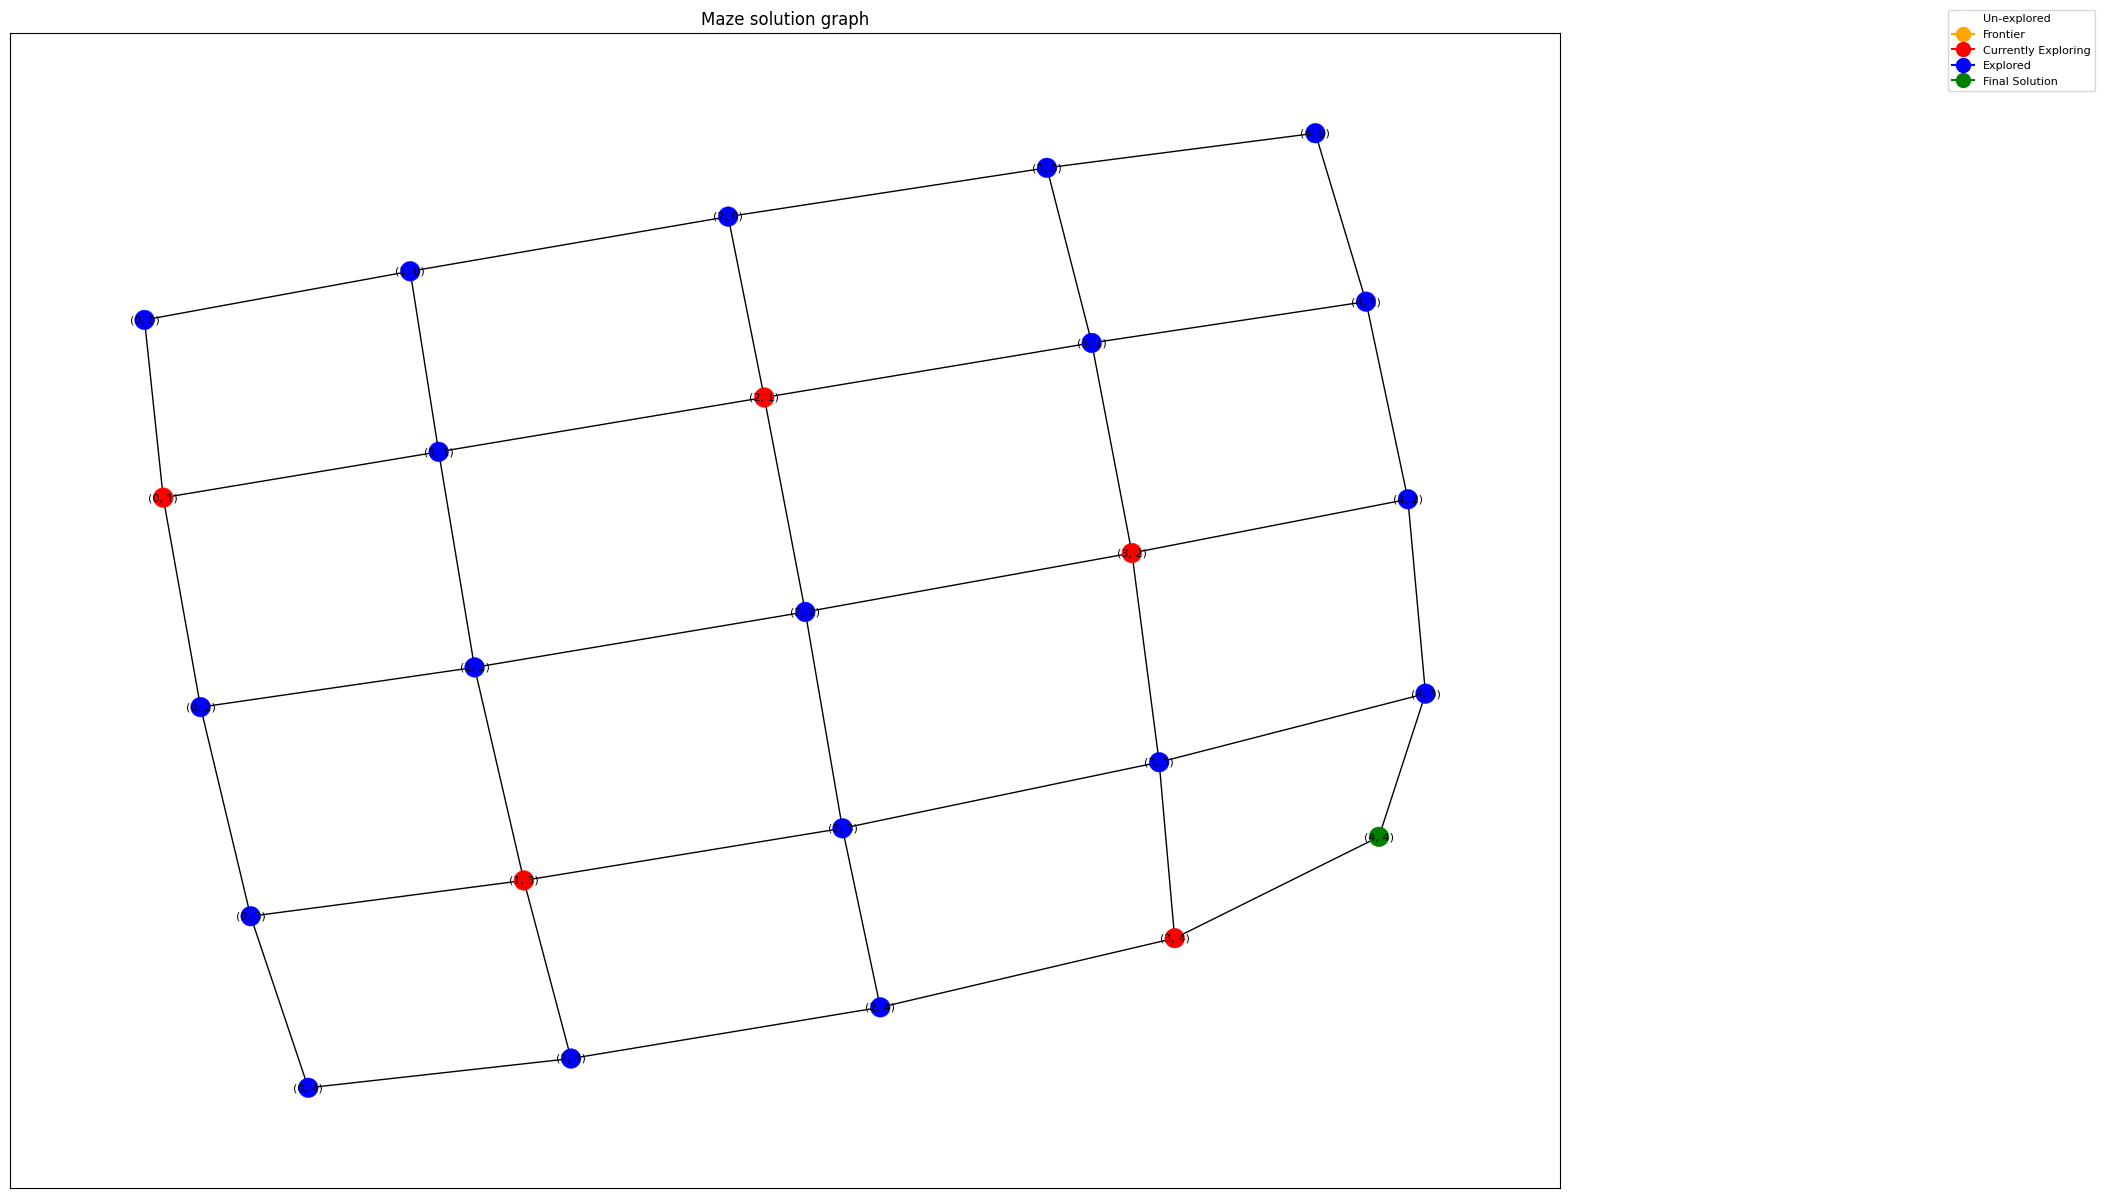

In [58]:
drawSearchTree(originalGraph, a, solutionColors)

**Breadth-first search**




When all actions have the same cost, an appropriate strategy is *breadth-first search* (BFS), in which the root node is expanded first, then all the successors of the root node are expanded next,
then their successors, and so on.

A first-in-first-out
queue will be faster than a priority queue, and will give us the correct order of nodes: new
nodes (which are always deeper than their parents) go to the back of the queue, and old nodes,
which are shallower than the new nodes, get expanded first.

Tree	search can	be	used	is	the	state	space	is	a	tree,	otherwise	graph	search must	be	used.			All	search	algorithms	(BFS,	DFS,	uniform-cost,	A*,	etc)	are	variations	of	one	of	these	(usually	graph	search).		The	only	difference	between	tree	search	and	graph	search	is	that	tree	search	does	not	need	to	store	the	explored	set,	because	we	are	guaranteed	never	to attempt	to	visit	the	same	state	twice

*Reached* can be a set of states rather than a mapping from states to nodes, because once we’ve reached a state,
we can never find a better path to the state.

That also means we can do an ***early goal test*** checking whether a node is a solution as soon as it is generated, rather than the ***late goal test***
that *best-first search* uses, waiting until a node is popped off the queue

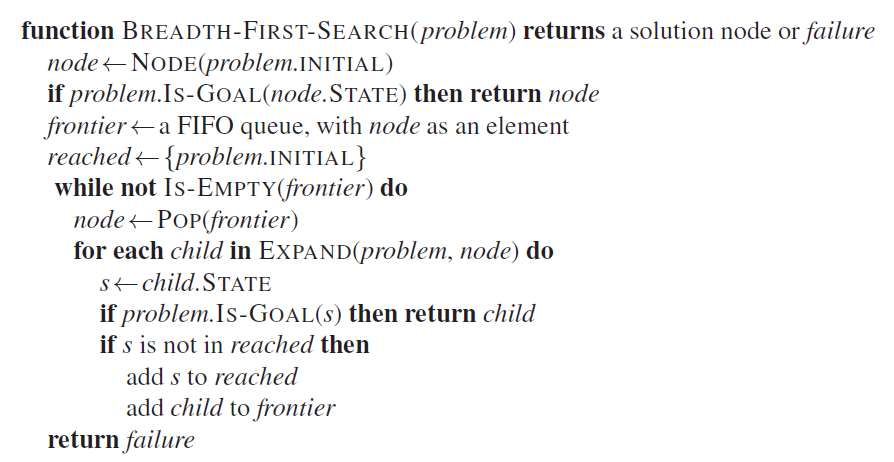

In [59]:
from agents import ProblemSolvingMazeAgentBREADTH_FS

In [60]:
goalState=(4,4)

In [61]:
BreadthFS_MazeAgent1=ProblemSolvingMazeAgentBREADTH_FS(initState,mazeWorldGraph1,goalState)

In [62]:
BreadthFS_MazeAgent1.goal

(4, 4)

In [63]:
a

array([[1, 0, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1]])

In [64]:
print(BreadthFS_MazeAgent1((3,3)))

Reached: {(3, 3)} 
Frontier: deque([<Node (3, 3)>]) 
The node (3, 3) is extracted from frontier:
The child node <Node (2, 3)>.
The child node <Node (4, 3)>.
Reached: {(2, 3), (3, 3), (4, 3)} 
Frontier: deque([<Node (2, 3)>, <Node (4, 3)>]) 
The node (2, 3) is extracted from frontier:
The child node <Node (2, 2)>.
The child node <Node (2, 4)>.
The child node <Node (3, 3)>.
Reached: {(2, 4), (4, 3), (2, 3), (3, 3), (2, 2)} 
Frontier: deque([<Node (4, 3)>, <Node (2, 2)>, <Node (2, 4)>]) 
The node (4, 3) is extracted from frontier:
The child node <Node (4, 2)>.
The child node <Node (3, 3)>.
The child node <Node (4, 4)>.
We have found our goal: (4, 4)
<Node (4, 4)>
Solution (a sequence of actions) from the initial state to a goal: ['down', 'right']
down


In [65]:
BreadthFS_MazeAgent1.formulate_problem(BreadthFS_MazeAgent1.state,BreadthFS_MazeAgent1.goal).actions((3, 3))

['up', 'down']

**Tasks:**

1. Generate a random Maze with size (7,7) as a Numpy matrix, which includes 25% of occupied cells (walls).
2. Build the Maze state space.
3. Develop a transition model according to the following:
* The Rat-Agent is allowed to move only on free cells by using the following actions: *left, up, right, down*.
* Since the Maze is 7-story building different actions have different costs: left/right: -2 (from Agent's performance); down:-1; up:-4.
4. Implement 2 Rat-Agents (based on Uniform-cost  and BreadthFirst Search algoritms) and apply them (separately) to find out which one is more productive for getting cheese (which Agent spends less peformance to get cheese).
* for Uniform-cost Search apply BEST-FIRST-SEARCH
with PATH-COST as the evaluation function
* PATH-COST is the total cost of the path from the initial state to the node if actions costs are: left/right: 2 (if the action 'left'/'right' is applied to get the child-node from parent-node);down:1; up:4.
5. Visualize the 2 search trees accordingly.
6. Let's assume that the Rat-Agent (being in the initial state [0,0]) figured out (probably he could smell it) that the cheese is at the top of the Maze.
* place the cheese in random cell but above 4th level (row) of the Maze
* implement 2 search programs (based on Depth-first and Depth-limited strategies) for 2 to Rat-Agents and determine which Agent (DFS-based or DLS-base) will find the cheese faster (assuming that one move in the Maze takes 1 sec.)

